In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [2]:
df = pd.read_csv('house-price-prediction-dataset.csv')
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [4]:
print(f"the total null values present in respective columns :\n {df.isnull().sum()}")

the total null values present in respective columns :
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [11]:
X = df.select_dtypes(include=['int64', 'float64']).drop('price', axis=1)
y = df['price']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)


In [13]:
x_train.shape

(3680, 12)

In [14]:
y_train.shape

(3680,)

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Model Evaluation\n")

print("MAE:", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)
print("Root MSE:", np.sqrt(mse))
print("R2 Score:", r2_score(y_test, y_pred))

Model Evaluation

MAE: 210908.1732501095
MSE : 986921767056.1227
Root MSE: 993439.3625461609
R2 Score: 0.03228385663277933


<Axes: xlabel='sqft_living', ylabel='price'>

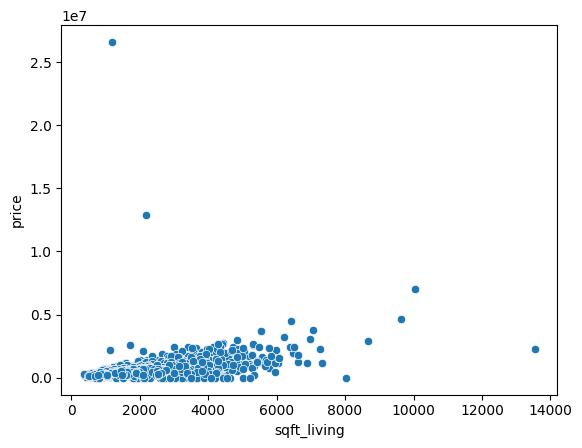

In [22]:
import seaborn as sns

sns.scatterplot(x = df['sqft_living'], y = df['price'])